Ruta más barata de A a E: ['A', 'C', 'D', 'E'] con costo 13


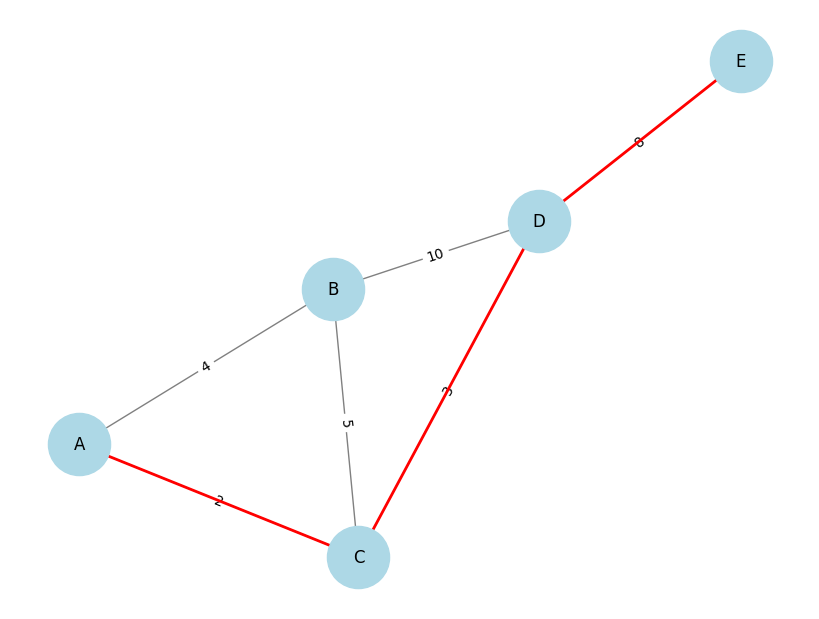

In [3]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def uniform_cost_search(graph, start, goal):
    priority_queue = [(0, start, [])]  # (costo acumulado, nodo actual, camino recorrido)
    visited = set()
    
    while priority_queue:
        cost, node, path = heapq.heappop(priority_queue)
        
        if node in visited:
            continue
        
        path = path + [node]
        visited.add(node)
        
        if node == goal:
            return cost, path
        
        for neighbor, edge_cost in graph[node].items():
            if neighbor not in visited:
                heapq.heappush(priority_queue, (cost + edge_cost['weight'], neighbor, path))
    
    return float('inf'), []  # No se encontró un camino

def draw_graph(graph, path=[]):
    pos = nx.spring_layout(graph)
    labels = nx.get_edge_attributes(graph, 'weight')
    
    plt.figure(figsize=(8,6))
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=2000, edge_color='gray')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
    
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='red', width=2)
    
    plt.show()

# Definir el grafo
G = nx.Graph()
cities = {
    'A': {'B': 4, 'C': 2},
    'B': {'A': 4, 'C': 5, 'D': 10},
    'C': {'A': 2, 'B': 5, 'D': 3},
    'D': {'B': 10, 'C': 3, 'E': 8},
    'E': {'D': 8}
}

for city, neighbors in cities.items():
    for neighbor, cost in neighbors.items():
        G.add_edge(city, neighbor, weight=cost)

# Encontrar la ruta más barata entre A y E
start_city, goal_city = 'A', 'E'
cost, path = uniform_cost_search(G, start_city, goal_city)
print(f"Ruta más barata de {start_city} a {goal_city}: {path} con costo {cost}")

draw_graph(G, path)
